In [ ]:
from bisect import bisect_left, bisect_right

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon, rankdata

def a12(treatment, control):
    m = len(treatment)
    n = len(control)

    r = rankdata(treatment + control)
    r1 = sum(r[0:m])

    # Compute the measure
    return (r1 / m - (m + 1) / 2) / n  # formula (14) in Vargha and Delaney, 2000


def interpret(A):
    assert (0 <= A <= 1)

    magnitude = ["N", "S", "M", "L"]
    if A >= 0.5:
        levels = [0.56, 0.64, 0.71]
        i = bisect_right(levels, A)
    else:
        levels = [0.29, 0.34, 0.44]
        magnitude.reverse()
        i = bisect_left(levels, A)

In [55]:
df_all = pd.DataFrame()
casestudies = ['eshopper', 'trainticket']

for cs in casestudies:
    df = pd.read_csv('../results/{}/rq1.csv'.format(cs))
    df = df[(df.algo == 'gra')]
    df = df.groupby('exp').mean()[['fmeasure', 'precision', 'recall', 'time']]
    df.sort_index('index', inplace=True)

    df_new = pd.read_csv('../results/{}/rq1_new.csv'.format(cs))
    df_new = df_new.groupby('exp').mean()[['fmeasure', 'precision', 'recall', 'time']]
    
    df['version'] ='original' 
    df_new['version'] ='modified'
    df['casestudy'] = cs
    df_new['casestudy'] = cs
    df_new.sort_index('index', inplace=True)

    
    df_all = pd.concat([df_all, df, df_new])

    _, p = wilcoxon(df.fmeasure, df_new.fmeasure)
    print("Wilcoxon test results for {}".format(cs))
    A = a12(df.fmeasure, df_new.fmeasure)
    print("p-value:{}, A12:{}, A12 interpretation: {}\n".format(p,  A, interpret(A)))

Wilcoxon test results for eshopper
p-value:0.7173535621498253, A12:0.0, A12 interpretation: None

Wilcoxon test results for trainticket
p-value:0.8431293969609626, A12:0.0, A12 interpretation: None



In [56]:
df_all.replace({"eshopper":"E-Shopper", "trainticket":"Train Ticket"}, inplace=True)
df_all.replace({"original":"Original", "modified":"Modified"}, inplace=True)

df_all.rename(columns={"version": "Mutation Operator Version"}, inplace=True)

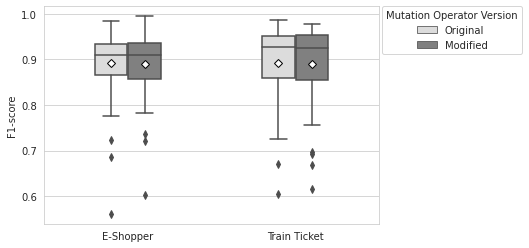

In [68]:
df_all.replace({"eshopper":"E-Shopper", "trainticket":"Train Ticket"}, inplace=True)
df_all.replace({"original":"Original", "modified":"Modified"}, inplace=True)

df_all.rename(columns={"version": "Mutation Operator Version"}, inplace=True)

sns.set_style("whitegrid")
sns.boxplot(data=df_all,
            y='fmeasure',
            x='casestudy',
            hue='Mutation Operator Version',
            showmeans=True,
            palette=['gainsboro', 'grey'],
            meanprops={"marker":"D", "markerfacecolor":"white","markeredgecolor":"black"},
            width=0.4)
plt.legend(title="Mutation Operator Version", bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)

plt.xlabel("")
plt.ylabel("F1-score")

plt.savefig("../figures/mutation_operator_assessment.pdf")
